# Sistem Rekomendasi - Muhamad Rifqi Afriansyah

# Ringkasan Proyek

Proyek ini bertujuan untuk membangun sistem rekomendasi destinasi wisata di Indonesia dengan memanfaatkan pendekatan Content-based Filtering dan Collaborative Filtering. Seiring dengan meningkatnya jumlah wisatawan, sistem ini diharapkan dapat membantu pengguna menemukan destinasi yang sesuai dengan preferensi pribadi mereka.


# Business Understanding

## Problem Statements
1. Bagaimana cara memberikan rekomendasi destinasi wisata yang relevan berdasarkan deskripsi konten dan kategori?
2. Bagaimana memanfaatkan data rating pengguna untuk meningkatkan akurasi rekomendasi?
3. Bagaimana mengukur relevansi rekomendasi untuk memastikan sistem memberikan hasil yang tepat?

## Goals
1. Mengembangkan sistem rekomendasi berbasis konten yang efektif menggunakan deskripsi dan kategori destinasi wisata.
2. Membangun sistem rekomendasi berdasarkan pola rating pengguna.
3. Mengukur performa sistem rekomendasi dengan menggunakan metrik evaluasi yang tepat.

#### Solution Approach

1. **Preprocessing:**  
   a. Menggabungkan deskripsi dan kategori menjadi tags.  
   b. Pembersihan teks.  
   c. Vektorisasi teks menggunakan TF-IDF Vectorizer.

2. **Modelling:**  
   Kami mengimplementasikan dua pendekatan untuk membangun sistem rekomendasi:  
   a. Content-based Filtering.  
   b. Collaborative Filtering.

3. **Evaluasi:**  
   Melakukan evaluasi untuk mengukur performa sistem rekomendasi.


## Menghubungkan Google Colab dengan Kaggle API

In [1]:
# Mengimpor modul 'files' dari paket 'google.colab'
# Modul ini digunakan untuk melakukan interaksi dengan file di Google Colab, seperti mengunggah atau mengunduh file.

from google.colab import files

# Memanggil fungsi 'upload()' dari modul 'files' untuk memungkinkan pengguna mengunggah file ke lingkungan Google Colab.
# Fungsi ini akan membuka dialog yang memungkinkan pengguna untuk memilih file yang akan diunggah dari sistem mereka.

files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhamadrifqi13","key":"eae740589aead76a52fc8280722f9fac"}'}

**Mengatur permissions dan memindahkan file:**

In [2]:
# Membuat direktori tersembunyi '.kaggle' di dalam direktori home (~) jika direktori tersebut belum ada.
# Opsi '-p' memastikan bahwa direktori akan dibuat hanya jika belum ada, dan tidak akan menampilkan error jika direktori sudah ada.
!mkdir -p ~/.kaggle

# Menyalin file 'kaggle.json' (yang berisi kredensial API Kaggle) ke dalam direktori '.kaggle' yang baru saja dibuat.
# File 'kaggle.json' biasanya digunakan untuk autentikasi API Kaggle agar dapat mengakses dataset atau melakukan tindakan lain melalui API Kaggle.
!cp kaggle.json ~/.kaggle/

# Mengubah hak akses file 'kaggle.json' agar hanya pemilik file yang dapat membaca dan menulis file tersebut.
# Perintah 'chmod 600' mengatur file agar hanya dapat diakses oleh pengguna yang memiliki file tersebut (read & write permission untuk owner).
!chmod 600 ~/.kaggle/kaggle.json


**Mengunduh dataset**

In [3]:
# Mengunduh dataset dari Kaggle menggunakan API Kaggle.
# Dataset yang diunduh berdasarkan identifier 'aprabowo/indonesia-tourism-destination'.
# Perintah ini mengunduh file ZIP yang berisi dataset.
!kaggle datasets download -d aprabowo/indonesia-tourism-destination

# Membuat direktori 'dataset' jika belum ada.
# Direktori ini akan digunakan untuk menampung file dataset yang telah diekstrak.
!mkdir -p dataset

# Mengekstrak file ZIP yang baru saja diunduh ke dalam direktori 'dataset'.
# Opsi '-o' berarti file yang ada akan di-overwrite jika ada file dengan nama yang sama.
# Opsi '-q' mengaktifkan mode quiet, yang berarti output dari perintah unzip tidak akan ditampilkan di layar.
!unzip -o -q indonesia-tourism-destination.zip -d dataset

# Menghapus file ZIP setelah ekstraksi selesai untuk membersihkan ruang penyimpanan.
# Hal ini mengurangi ukuran yang tidak diperlukan setelah dataset berhasil diekstrak.
!rm indonesia-tourism-destination.zip


Dataset URL: https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination
License(s): copyright-authors
  0% 0.00/158k [00:00<?, ?B/s]
100% 158k/158k [00:00<00:00, 73.7MB/s]


### Mengimpor Seluruh Library yang Diperlukan

In [4]:
# Menginstal pustaka Sastrawi menggunakan pip.
# Sastrawi adalah pustaka Python yang digunakan untuk pemrosesan teks bahasa Indonesia,
# terutama untuk melakukan stemming (mengembalikan kata ke bentuk dasar) dan analisis teks lainnya.
!pip install Sastrawi


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.6 MB/s eta 0:00:00


In [5]:
# Mengimpor pustaka untuk manipulasi array numerik dan operasi matematika
import numpy as np  # NumPy adalah pustaka fundamental untuk komputasi numerik di Python, terutama untuk array dan matriks.

# Mengimpor pustaka untuk manipulasi data dalam format tabel (dataframe)
import pandas as pd  # Pandas digunakan untuk manipulasi data yang efisien, seperti data frame dan time series.

# Mengimpor pustaka untuk visualisasi data
import matplotlib.pyplot as plt  # Matplotlib digunakan untuk membuat grafik dan visualisasi 2D.
import seaborn as sns  # Seaborn adalah pustaka visualisasi berbasis Matplotlib yang menyediakan visualisasi statistik yang lebih menarik dan informatif.

# Mengimpor pustaka untuk pemrosesan teks
from sklearn.feature_extraction.text import TfidfVectorizer  # TfidfVectorizer digunakan untuk mengubah teks menjadi representasi numerik (TF-IDF), berguna untuk analisis teks dan NLP.
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Mengimpor Stemmer dari pustaka Sastrawi, yang digunakan untuk proses stemming (mengubah kata ke bentuk dasar) dalam bahasa Indonesia.
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Mengimpor StopWordRemover dari Sastrawi untuk menghapus stopwords dalam teks bahasa Indonesia.

# Mengimpor pustaka untuk pengukuran kemiripan teks
from sklearn.metrics.pairwise import cosine_similarity  # Cosine similarity digunakan untuk mengukur sejauh mana dua vektor teks serupa satu sama lain.

# Mengimpor pustaka untuk pengukuran kesalahan dalam model regresi
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Digunakan untuk mengukur seberapa baik performa model regresi menggunakan kesalahan kuadrat dan kesalahan absolut rata-rata.

# Mengimpor pustaka untuk deep learning
import tensorflow as tf  # TensorFlow adalah pustaka open-source untuk komputasi numerik dan machine learning, dengan dukungan untuk jaringan saraf dalam.
from tensorflow import keras  # Keras adalah antarmuka tinggi untuk TensorFlow, yang menyediakan API yang lebih mudah digunakan untuk membangun dan melatih model deep learning.
from tensorflow.keras import layers  # Modul layers dari Keras digunakan untuk membangun lapisan-lapisan dalam model deep learning, seperti lapisan Dense, Conv2D, dll.


### Memuat Dataset Menggunakan Pandas
Setelah dataset diunduh dan diekstrak, data dimuat menggunakan pandas.

In [6]:
# Membaca file CSV yang berisi data rating destinasi wisata
# 'dataset/tourism_rating.csv' adalah file CSV yang berisi informasi mengenai rating atau penilaian destinasi wisata
# Data ini dimuat ke dalam DataFrame pandas bernama 'data_tourism_rating'.
data_tourism_rating = pd.read_csv('dataset/tourism_rating.csv')

# Membaca file CSV yang berisi data destinasi wisata dengan ID unik
# 'dataset/tourism_with_id.csv' adalah file CSV yang berisi informasi destinasi wisata beserta ID unik untuk setiap destinasi.
# Data ini dimuat ke dalam DataFrame pandas bernama 'data_tourism_with_id'.
data_tourism_with_id = pd.read_csv('dataset/tourism_with_id.csv')


## Data Understanding

Dataset yang digunakan terdiri dari dua file utama:

1. **tourism_with_id.csv**: Memuat informasi lengkap tentang destinasi wisata, seperti nama, deskripsi, kategori, lokasi, harga, rating, dan koordinat.
2. **tourism_rating.csv**: Berisi data rating yang diberikan oleh pengguna terhadap destinasi wisata tertentu.

### Eksplorasi Data

- **Jumlah Data:**
  - `tourism_with_id.csv`: 437 baris dan 11 kolom.
  - `tourism_rating.csv`: 10.000 baris dan 3 kolom.

### Deskripsi Fitur

| **Fitur**           | **Deskripsi**                                                              |
|---------------------|----------------------------------------------------------------------------|
| `Place_Id`          | Identifikasi unik untuk setiap destinasi wisata.                           |
| `Place_Name`        | Nama destinasi wisata.                                                    |
| `Description`       | Deskripsi singkat tentang destinasi wisata.                                |
| `Category`          | Kategori destinasi (misalnya, Budaya, Alam, Wisata Kuliner, dll).          |
| `City`              | Kota tempat destinasi wisata berada.                                       |
| `Price`             | Harga tiket masuk destinasi wisata.                                        |
| `Rating`            | Rating rata-rata dari pengguna untuk destinasi tersebut.                   |
| `Time_Minutes`      | Waktu yang dibutuhkan untuk mengunjungi destinasi wisata.                  |
| `Coordinate`        | Koordinat geografis destinasi wisata.                                      |
| `Lat`               | Latitude lokasi destinasi wisata.                                          |
| `Long`              | Longitude lokasi destinasi wisata.                                         |
| `Unnamed: 11`       | Kolom kosong.                                                              |
| `Unnamed: 12`       | Kolom kosong.                                                              |

### Visualisasi Data:
- **Distribusi Rating Destinasi Wisata**: Untuk melihat sebaran rating yang diterima destinasi.
- **Jumlah Destinasi per Kategori**: Menampilkan jumlah destinasi yang ada di setiap kategori.
- **Jumlah Rating per Destinasi (Top 10)**: Menampilkan destinasi dengan jumlah rating tertinggi.


## Exploratory Data Analysis
EDA bertujuan untuk memahami lebih dalam tentang data yang kita miliki. Berikut adalah langkah-langkah EDA yang lebih mendalam untuk dataset ini.

In [7]:
# Menampilkan 5 baris pertama dari dataset 'data_tourism_rating' untuk memberikan gambaran umum tentang struktur data.
# Fungsi 'head()' digunakan untuk menampilkan bagian awal dataset, yang berguna untuk melihat kolom dan beberapa nilai pertama.
print("Dataset Tourism Rating:")
display(data_tourism_rating.head())

# Menampilkan informasi mendetail mengenai dataset 'data_tourism_rating', termasuk tipe data setiap kolom, jumlah nilai non-null, dan penggunaan memori.
# Fungsi 'info()' memberikan gambaran umum tentang data seperti jumlah baris, tipe data, dan apakah ada nilai yang hilang (missing values).
print("\nInformasi Dataset Tourism Rating:")
display(data_tourism_rating.info())


Dataset Tourism Rating:


,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4



Informasi Dataset Tourism Rating:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


None

In [8]:
# Menampilkan 5 baris pertama dari dataset 'data_tourism_with_id' untuk memberikan gambaran umum tentang struktur data.
# Fungsi 'head()' digunakan untuk menampilkan bagian awal dataset, yang memungkinkan kita untuk melihat kolom dan beberapa nilai pertama.
print("Dataset Tourism with ID:")
display(data_tourism_with_id.head())

# Menampilkan informasi mendetail mengenai dataset 'data_tourism_with_id', termasuk tipe data setiap kolom, jumlah nilai non-null, dan penggunaan memori.
# Fungsi 'info()' memberikan gambaran umum tentang dataset seperti jumlah baris, tipe data, dan apakah ada nilai yang hilang (missing values).
print("\nInformasi Dataset Tourism with ID:")
display(data_tourism_with_id.info())


Dataset Tourism with ID:


,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5



Informasi Dataset Tourism with ID:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


None

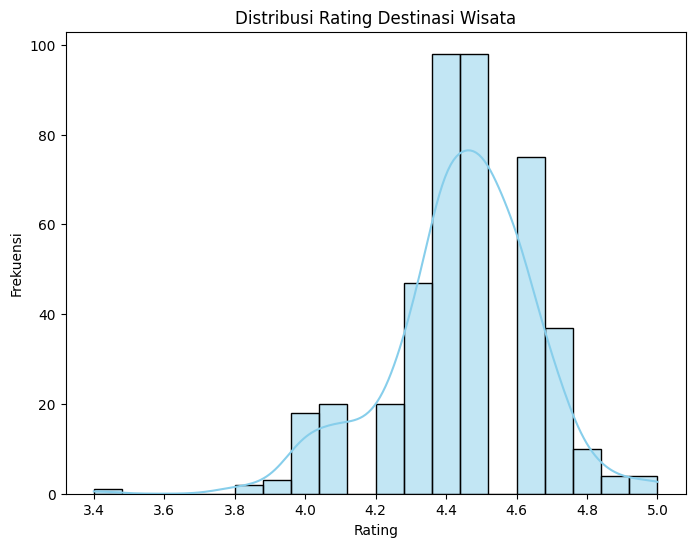

In [9]:
# Membuat plot distribusi rating destinasi wisata menggunakan seaborn dan matplotlib
# Fungsi 'histplot' digunakan untuk membuat histogram distribusi rating, dengan opsi untuk menambahkan estimasi kepadatan kernel (KDE).
plt.figure(figsize=(8,6))  # Menentukan ukuran figure (grafik) agar lebih besar dan mudah dibaca, dengan lebar 8 dan tinggi 6 inci.

# Membuat histogram untuk kolom 'Rating' dari dataset 'data_tourism_with_id'
# Parameter 'bins=20' membagi data ke dalam 20 interval atau kelompok.
# 'kde=True' menambahkan kurva estimasi kepadatan kernel (KDE) untuk memperlihatkan distribusi data yang lebih halus.
# 'color='skyblue'' memberi warna biru muda pada histogram.
sns.histplot(data_tourism_with_id['Rating'], bins=20, kde=True, color='skyblue')

# Menambahkan judul ke grafik
plt.title('Distribusi Rating Destinasi Wisata')

# Menambahkan label sumbu X dan Y
plt.xlabel('Rating')  # Label sumbu X menunjukkan rating destinasi wisata
plt.ylabel('Frekuensi')  # Label sumbu Y menunjukkan jumlah frekuensi untuk setiap rating

# Menampilkan grafik
plt.show()


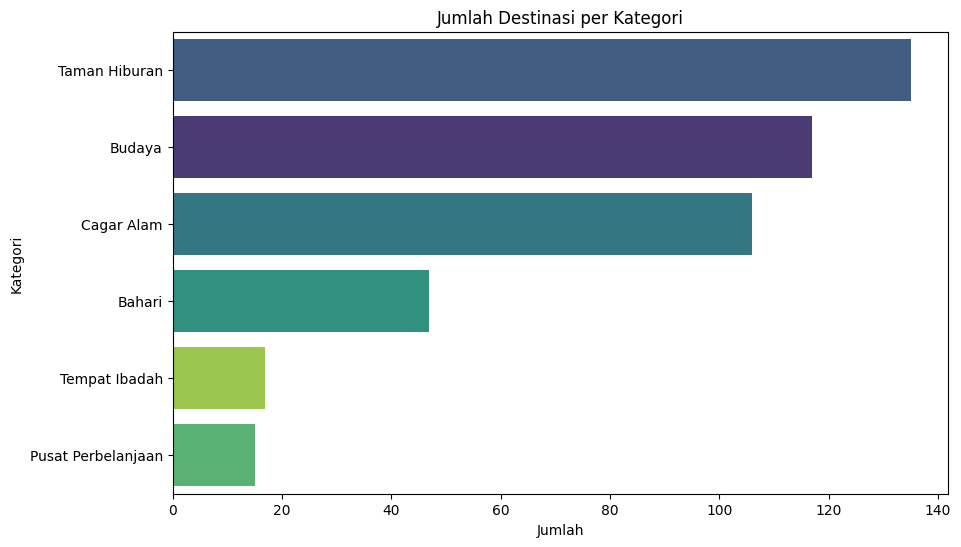

In [10]:
# Membuat plot jumlah destinasi wisata berdasarkan kategori menggunakan countplot dari seaborn
# Fungsi 'countplot' digunakan untuk menghitung dan menampilkan jumlah data dalam setiap kategori pada kolom 'Category'.

plt.figure(figsize=(10,6))  # Menentukan ukuran figure (grafik) menjadi 10 inci lebar dan 6 inci tinggi untuk visualisasi yang lebih jelas.

# Membuat countplot untuk kolom 'Category' dari dataset 'data_tourism_with_id'
# 'y='Category'' menunjukkan bahwa kolom 'Category' akan ditempatkan pada sumbu Y.
# 'order=data_tourism_with_id['Category'].value_counts().index' mengurutkan kategori berdasarkan jumlah frekuensinya, dari yang terbanyak.
# 'palette='viridis'' memilih palet warna 'viridis', yang memberikan gradasi warna yang menarik untuk visualisasi.
# 'hue='Category'' mewarnai setiap kategori berdasarkan label kategori tersebut, meskipun di sini legend=False berarti legenda tidak ditampilkan.
sns.countplot(data=data_tourism_with_id, y='Category', order=data_tourism_with_id['Category'].value_counts().index, palette='viridis', hue='Category', legend=False)

# Menambahkan judul grafik
plt.title('Jumlah Destinasi per Kategori')

# Menambahkan label pada sumbu X dan Y
plt.xlabel('Jumlah')  # Sumbu X menunjukkan jumlah destinasi wisata dalam setiap kategori
plt.ylabel('Kategori')  # Sumbu Y menunjukkan kategori destinasi wisata

# Menampilkan grafik
plt.show()


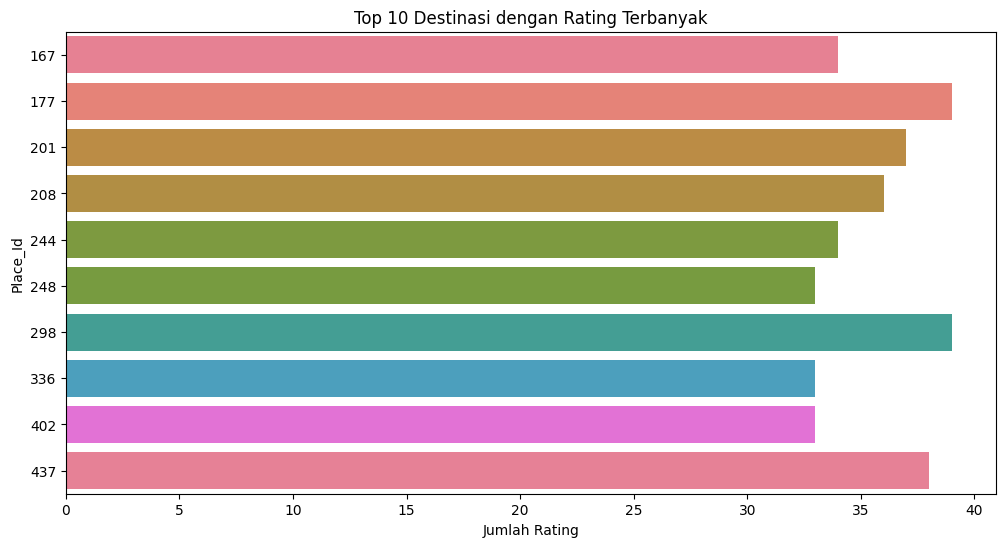

In [11]:
# Membuat plot batang untuk jumlah rating per destinasi wisata (Top 10)
# Fungsi 'barplot' digunakan untuk membuat grafik batang horizontal yang menunjukkan jumlah rating per destinasi wisata.

plt.figure(figsize=(12,6))  # Menentukan ukuran figure (grafik) menjadi 12 inci lebar dan 6 inci tinggi untuk tampilan yang lebih jelas.

# Menghitung jumlah rating per destinasi berdasarkan 'Place_Id' dan memilih 10 teratas
rating_counts = data_tourism_rating['Place_Id'].value_counts().head(10)

# Membuat barplot untuk menampilkan jumlah rating per destinasi
# 'x=rating_counts.values' memberikan jumlah rating sebagai nilai sumbu X.
# 'y=rating_counts.index' memberikan ID destinasi wisata sebagai label pada sumbu Y.
# 'orient='h'' memastikan grafik batang horizontal (horizontal bar plot).
# 'palette='husl'' menggunakan palet warna 'husl' untuk variasi warna batang.
# 'hue=rating_counts.index' memberikan pewarnaan berdasarkan ID destinasi, meskipun legenda dinonaktifkan dengan 'legend=False'.
sns.barplot(x=rating_counts.values, y=rating_counts.index, orient='h', palette='husl', hue=rating_counts.index, legend=False)

# Menambahkan judul grafik
plt.title('Top 10 Destinasi dengan Rating Terbanyak')

# Menambahkan label pada sumbu X dan Y
plt.xlabel('Jumlah Rating')  # Sumbu X menunjukkan jumlah rating untuk setiap destinasi
plt.ylabel('Place_Id')  # Sumbu Y menunjukkan ID destinasi wisata

# Menampilkan grafik
plt.show()


## Data Preparation

### Langkah-langkah yang Dilakukan:
1. **Mengatasi Missing Values:**
   - Memeriksa nilai yang hilang pada kedua dataset.
   - Menghapus kolom yang tidak relevan atau memiliki banyak nilai yang hilang.

2. **Membagi data menjadi train dan test**

2. **Menggabungkan Dataset:**
   - Menggabungkan `tourism_rating.csv` dengan `tourism_with_id.csv` berdasarkan `Place_Id` untuk memperoleh informasi lengkap tentang setiap destinasi beserta rating rata-rata.

In [12]:
# Mengecek jumlah nilai yang hilang (missing values) di dataset 'data_tourism_with_id'
# Fungsi 'isna()' digunakan untuk mendeteksi nilai yang hilang dalam DataFrame.
# Fungsi 'sum()' menghitung jumlah nilai yang hilang (NaN) di setiap kolom.

print("Nilai yang hilang di tourism_with_id:")
print(data_tourism_with_id.isna().sum())  # Menampilkan jumlah nilai yang hilang per kolom pada dataset 'data_tourism_with_id'

# Mengecek jumlah nilai yang hilang di dataset 'data_tourism_rating'
print("\nNilai yang hilang di tourism_rating:")
print(data_tourism_rating.isna().sum())  # Menampilkan jumlah nilai yang hilang per kolom pada dataset 'data_tourism_rating'


Nilai yang hilang di tourism_with_id:
Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64

Nilai yang hilang di tourism_rating:
User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64


In [13]:
# Menghapus kolom-kolom yang tidak diperlukan dari dataset 'data_tourism_with_id'
# 'columns_to_drop' adalah daftar kolom yang akan dihapus. Kolom-kolom ini mungkin tidak relevan untuk analisis lebih lanjut.

columns_to_drop = ['City', 'Price', 'Time_Minutes', 'Coordinate', 'Lat', 'Long', 'Unnamed: 11', 'Unnamed: 12']

# Menggunakan 'drop()' untuk menghapus kolom-kolom yang ada dalam daftar 'columns_to_drop' dari dataset 'data_tourism_with_id'.
# 'axis=1' menunjukkan bahwa yang akan dihapus adalah kolom (bukan baris).
# 'errors='ignore'' memastikan bahwa jika ada kolom yang tidak ditemukan, tidak akan terjadi error, dan kolom tersebut akan diabaikan.
data_tourism_with_id_clean = data_tourism_with_id.drop(columns=columns_to_drop, axis=1, errors='ignore')

# Menampilkan daftar kolom setelah penghapusan untuk memverifikasi bahwa kolom-kolom yang tidak diperlukan telah dihapus
print("\nKolom setelah penghapusan:")
print(data_tourism_with_id_clean.columns)



Kolom setelah penghapusan:
Index(['Place_Id', 'Place_Name', 'Description', 'Category', 'Rating'], dtype='object')


In [14]:
# Menggabungkan dataset rating dengan dataset destinasi wisata
# Menggunakan fungsi 'merge' untuk menggabungkan data rating (dengan rata-rata rating per destinasi)
# dengan data destinasi wisata yang telah dibersihkan berdasarkan kolom 'Place_Id'.

recommendation_data = pd.merge(
    # Menghitung rata-rata rating untuk setiap destinasi berdasarkan 'Place_Id'
    # dengan grup berdasarkan 'Place_Id' dan menghitung rata-rata pada kolom 'Place_Ratings'.
    data_tourism_rating.groupby('Place_Id')['Place_Ratings'].mean().reset_index(),

    # Menggabungkan dengan data destinasi wisata yang telah dibersihkan (data_tourism_with_id_clean).
    # Penggabungan dilakukan berdasarkan kolom 'Place_Id' yang ada di kedua dataset.
    data_tourism_with_id_clean,

    # Menggunakan 'on='Place_Id'' untuk memastikan penggabungan dilakukan berdasarkan kolom 'Place_Id' yang sama.
    on='Place_Id'
)

# Mengisi nilai NaN pada kolom 'Description' dan 'Category' dengan string kosong ('')
# Hal ini dilakukan untuk memastikan tidak ada nilai yang hilang pada kolom tersebut yang dapat mengganggu analisis atau model.
recommendation_data['Description'] = recommendation_data['Description'].fillna('')
recommendation_data['Category'] = recommendation_data['Category'].fillna('')

# Memeriksa apakah ada duplikasi pada kolom 'Place_Name'
# Jika ada nilai duplikat pada kolom 'Place_Name', maka program akan memberi peringatan.
if recommendation_data['Place_Name'].duplicated().any():
    print("Peringatan: Terdapat 'Place_Name' yang duplikat.")

# Menampilkan beberapa baris pertama dari dataset yang sudah digabungkan (rekomendasi data) untuk memverifikasi hasil penggabungan
print("\nData Rekomendasi setelah penggabungan (Train Data):")
display(recommendation_data.head())



Data Rekomendasi setelah penggabungan (Train Data):


,Place_Id,Place_Ratings,Place_Name,Description,Category,Rating
0,1,3.722222,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,4.6
1,2,2.840000,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,4.6
2,3,2.526316,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,4.6
3,4,2.857143,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,4.5
4,5,3.520000,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,4.5


### Persiapan data untuk content-based filtering:
1. **Preprocessing Teks:**
   - Menggabungkan deskripsi dan kategori menjadi satu teks.
   - Melakukan lowercase, stemming, dan penghapusan stopword menggunakan library Sastrawi.

2. **Vektorisasi Teks:**
   - Menggunakan `TfidfVectorizer` untuk mengubah teks menjadi vektor numerik.

3. **Menghitung Similarity:**
   - Menggunakan cosine similarity untuk mengukur kesamaan antar destinasi berdasarkan vektor TF-IDF.

In [15]:
# Menyiapkan objek TfidfVectorizer untuk melakukan vektorisasi teks pada kolom 'Tags' dan 'Description'
# TfidfVectorizer mengubah teks menjadi vektor numerik dengan mempertimbangkan frekuensi kata dan invers frekuensi dokumen.

# Menginisialisasi TfidfVectorizer untuk kolom 'Tags' dengan batasan fitur sebanyak 5000, mempertimbangkan n-gram dari 1 hingga 2, dan hanya memasukkan kata yang muncul lebih dari sekali (min_df=2)
tv_tags = TfidfVectorizer(max_features=5000, ngram_range=(1,2), min_df=2)

# Menginisialisasi TfidfVectorizer untuk kolom 'Description' dengan konfigurasi yang sama seperti 'Tags'
tv_desc = TfidfVectorizer(max_features=5000, ngram_range=(1,2), min_df=2)

# Menginisialisasi objek stemmer dan stopword remover dari pustaka Sastrawi
stemmer = StemmerFactory().create_stemmer()  # Untuk melakukan stemming (mengubah kata ke bentuk dasar)
stopword = StopWordRemoverFactory().create_stop_word_remover()  # Untuk menghapus stopwords (kata-kata umum yang tidak membawa makna)

# Fungsi preprocessing untuk membersihkan teks
def preprocessing(text):
    """
    Melakukan preprocessing teks dengan mengubah ke lowercase, stemming, dan menghapus stopwords.

    Parameters:
    - text (str): Teks yang akan diproses.

    Returns:
    - str: Teks yang telah diproses.
    """
    text = text.lower()  # Mengubah semua huruf menjadi lowercase
    text = stemmer.stem(text)  # Melakukan stemming untuk mengubah kata ke bentuk dasar
    text = stopword.remove(text)  # Menghapus stopwords dari teks
    return text

# Menggabungkan kolom 'Description' dan 'Category' menjadi satu kolom 'Tags' dan menerapkan preprocessing teks
recommendation_data['Tags'] = recommendation_data['Description'] + ' ' + recommendation_data['Category']
recommendation_data['Tags'] = recommendation_data['Tags'].apply(preprocessing)  # Mengaplikasikan preprocessing pada kolom 'Tags'

# Preprocessing pada kolom 'Description' saja dan menyimpannya dalam kolom 'Description_Preprocessed'
recommendation_data['Description_Preprocessed'] = recommendation_data['Description'].apply(preprocessing)

# Vektorisasi teks pada kolom 'Tags' menggunakan TfidfVectorizer yang telah diinisialisasi sebelumnya
vectors_tags = tv_tags.fit_transform(recommendation_data['Tags'])

# Vektorisasi teks pada kolom 'Description_Preprocessed' menggunakan TfidfVectorizer yang telah diinisialisasi sebelumnya
vectors_desc = tv_desc.fit_transform(recommendation_data['Description_Preprocessed'])

# Menghitung Cosine Similarity antara vektor-vektor 'Tags' untuk menghitung kemiripan antar destinasi berdasarkan tags
similarity_tags = cosine_similarity(vectors_tags, dense_output=False)

# Menghitung Cosine Similarity antara vektor-vektor 'Description' untuk menghitung kemiripan antar destinasi berdasarkan deskripsi
similarity_desc = cosine_similarity(vectors_desc, dense_output=False)


### Persiapan data untuk collaborative filtering:

1. **Encoding Data:**  
   Mengubah `User_Id` dan `Place_Id` menjadi indeks numerik untuk keperluan pemodelan.

2. **Normalisasi Rating:**  
   Menormalisasi rating pengguna agar berada di antara 0 dan 1.

3. **Membagi Data:**  
   Memisahkan data menjadi data latih dan data validasi.

In [16]:
# Encoding User_Id dan Place_Id menjadi angka untuk keperluan model Collaborative Filtering
# Proses ini penting karena model machine learning memerlukan representasi numerik untuk variabel kategorikal seperti User_Id dan Place_Id.

# Mendapatkan semua nilai unik dari 'User_Id' dan 'Place_Id' dalam dataset 'data_tourism_rating'
user_ids = data_tourism_rating['User_Id'].unique().tolist()  # Daftar semua User_Id yang unik
place_ids = data_tourism_rating['Place_Id'].unique().tolist()  # Daftar semua Place_Id yang unik

# Membuat dictionary untuk mengubah User_Id ke dalam encoding numerik dan sebaliknya
# 'user_to_user_encoded' untuk mengubah User_Id menjadi angka
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}  # Encoding User_Id ke angka
# 'user_encoded_to_user' untuk mengubah angka kembali ke User_Id
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}  # Encoding terbalik dari angka ke User_Id

# Membuat dictionary untuk mengubah Place_Id ke dalam encoding numerik dan sebaliknya
# 'place_to_place_encoded' untuk mengubah Place_Id menjadi angka
place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}  # Encoding Place_Id ke angka
# 'place_encoded_to_place' untuk mengubah angka kembali ke Place_Id
place_encoded_to_place = {i: x for i, x in enumerate(place_ids)}  # Encoding terbalik dari angka ke Place_Id

# Membuat salinan dari data_tourism_rating dan menambahkan kolom 'user' dan 'place' yang sudah diencode
data_collab = data_tourism_rating.copy()  # Menyalin data_tourism_rating ke dalam data_collab
# Mengganti 'User_Id' dengan 'user' yang sudah diencode menggunakan dictionary 'user_to_user_encoded'
data_collab['user'] = data_collab['User_Id'].map(user_to_user_encoded)
# Mengganti 'Place_Id' dengan 'place' yang sudah diencode menggunakan dictionary 'place_to_place_encoded'
data_collab['place'] = data_collab['Place_Id'].map(place_to_place_encoded)

# Menyimpan jumlah user dan tempat setelah encoding
num_users = len(user_to_user_encoded)  # Total jumlah user setelah encoding
num_places = len(place_encoded_to_place)  # Total jumlah tempat setelah encoding

# Normalisasi Rating antara 0 dan 1
# Normalisasi dilakukan agar rating berada dalam rentang [0, 1] agar lebih mudah digunakan oleh model
min_rating = data_collab['Place_Ratings'].min()  # Nilai rating terendah
max_rating = data_collab['Place_Ratings'].max()  # Nilai rating tertinggi
# Menggunakan rumus normalisasi (x - min) / (max - min)
data_collab['normalized_rating'] = data_collab['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating))

# Membagi data untuk model Collaborative Filtering (CF)
# Data dibagi menjadi training dan validation set, dengan 80% data untuk training dan 20% untuk validasi

train_size_cf = int(0.8 * len(data_collab))  # Menentukan ukuran training set (80% dari total data)
# Membagi data menjadi fitur (user dan place) dan target (normalized_rating) untuk training set
x_train_cf = data_collab[['user', 'place']].values[:train_size_cf]  # Fitur untuk training set
y_train_cf = data_collab['normalized_rating'].values[:train_size_cf]  # Target untuk training set
# Membagi data menjadi fitur (user dan place) dan target (normalized_rating) untuk validation set
x_val_cf = data_collab[['user', 'place']].values[train_size_cf:]  # Fitur untuk validation set
y_val_cf = data_collab['normalized_rating'].values[train_size_cf:]  # Target untuk validation set


# Modeling and Result
### Content-based Filtering
**Langkah-langkah:**
- Memastikan place_name ada dalam data
- Mendapatkan indeks destinasi yang diminta
- Mendapatkan skor similarity untuk destinasi tersebut
- Mengurutkan destinasi berdasarkan similarity score
- Menghindari rekomendasi diri sendiri
- Mendapatkan top-n rekomendasi (dalam kasus ini adalah top 10)



In [17]:
def get_content_based_recommendations(place_name, data, similarity_matrix, top_n=10):
    """
    Mengembalikan rekomendasi Content-based Filtering untuk sebuah destinasi wisata.
    Fungsi ini akan memberikan rekomendasi destinasi wisata berdasarkan kesamaan (similarity)
    antara destinasi yang diberikan dengan destinasi lainnya, menggunakan matriks similarity yang telah dihitung.

    Parameters:
    - place_name (str): Nama destinasi wisata yang menjadi acuan untuk rekomendasi.
    - data (DataFrame): Dataset yang berisi informasi destinasi wisata (misalnya 'recommendation_data').
    - similarity_matrix (ndarray): Matriks similarity yang menghitung kesamaan antar destinasi wisata.
    - top_n (int): Jumlah rekomendasi yang ingin diberikan, default adalah 10.

    Returns:
    - list: Daftar **Place_Id** destinasi wisata yang direkomendasikan berdasarkan similarity dengan destinasi yang diminta.
    """
    # Memastikan place_name ada dalam data
    # Mengecek apakah destinasi wisata yang diminta ada dalam dataset atau tidak
    if place_name not in data['Place_Name'].values:
        print(f"'{place_name}' TIDAK ditemukan dalam dataset.")
        return []  # Mengembalikan list kosong jika destinasi tidak ada dalam dataset

    # Mendapatkan indeks destinasi yang diminta dalam dataset
    # Temukan indeks destinasi berdasarkan nama 'place_name' dalam dataset
    place_idx = data[data['Place_Name'] == place_name].index[0]

    # Mendapatkan skor similarity untuk destinasi tersebut (dari matriks similarity)
    # Ambil baris dari matriks similarity yang sesuai dengan destinasi yang diminta
    place_similarity = similarity_matrix[place_idx].toarray().flatten()

    # Mengurutkan destinasi berdasarkan similarity score secara menurun (descending)
    # Mengurutkan berdasarkan kesamaan dari yang tertinggi ke yang terendah
    similar_indices = place_similarity.argsort()[::-1]

    # Menghindari rekomendasi diri sendiri
    # Menghapus indeks destinasi yang sama dengan destinasi yang diminta dari daftar rekomendasi
    similar_indices = similar_indices[similar_indices != place_idx]

    # Mendapatkan top-n rekomendasi (mengambil 'top_n' destinasi dengan skor similarity tertinggi)
    top_indices = similar_indices[:top_n]

    # Mendapatkan daftar Place_Id dari destinasi yang direkomendasikan berdasarkan indeks yang terpilih
    recommended_place_ids = data.iloc[top_indices]['Place_Id'].tolist()

    # Mengembalikan daftar Place_Id destinasi yang direkomendasikan
    return recommended_place_ids


In [18]:
# Contoh penggunaan fungsi rekomendasi Content-based Filtering
place_to_recommend = 'Wisata Alam Kalibiru'  # Menentukan nama destinasi yang akan digunakan untuk rekomendasi

# Mendapatkan daftar Place_Id yang direkomendasikan menggunakan fungsi 'get_content_based_recommendations'
# Menggunakan 'similarity_tags' yang merupakan matriks cosine similarity berdasarkan tags destinasi
recommended_place_ids = get_content_based_recommendations(place_to_recommend, recommendation_data, similarity_tags, top_n=10)

# Memeriksa apakah rekomendasi tidak kosong
# Jika tidak ada rekomendasi yang ditemukan, cetak pesan bahwa tidak ada rekomendasi untuk destinasi tersebut
if not recommended_place_ids:
    print(f"Tidak ada rekomendasi yang ditemukan untuk '{place_to_recommend}'.")
else:
    # Jika rekomendasi ditemukan, ambil informasi detail destinasi berdasarkan Place_Id
    # Menyaring dataset 'data_tourism_with_id_clean' untuk mencocokkan Place_Id yang direkomendasikan
    recommended_destinations = data_tourism_with_id_clean[
        data_tourism_with_id_clean['Place_Id'].isin(recommended_place_ids)  # Filter berdasarkan Place_Id
    ][['Place_Name', 'Category', 'Rating', 'Description']].copy()  # Ambil kolom yang relevan

    # Menambahkan kolom nomor urut untuk kemudahan referensi
    # Mengatur ulang indeks sehingga dimulai dari 1 (bukan 0)
    recommended_destinations.reset_index(drop=True, inplace=True)  # Reset indeks dan hapus indeks lama
    recommended_destinations.index += 1  # Menambahkan 1 ke indeks untuk memulai dari 1
    recommended_destinations.index.name = 'No.'  # Menyebutkan nama indeks sebagai 'No.'

    # Menampilkan hasil rekomendasi
    print(f"Rekomendasi berdasarkan Content-based Filtering untuk '{place_to_recommend}':")
    display(recommended_destinations)  # Menampilkan DataFrame hasil rekomendasi


Rekomendasi berdasarkan Content-based Filtering untuk 'Wisata Alam Kalibiru':


,Place_Name,Category,Rating,Description
No.,,,,
1,Watu Lumbung,Cagar Alam,4.3,Letak Kampung Edukasi Watu Lumbung yang berada...
2,Wisata Kaliurang,Cagar Alam,4.4,"Jogja selalu menarik untuk dikulik, terlebih t..."
3,Ciwangun Indah Camp Official,Cagar Alam,4.3,Ciwangun Indah Camp atau CIC adalah sebuah tem...
4,Curug Cilengkrang,Cagar Alam,4.0,Curug Cilengkrang bisa menjadi pilihan tujuan ...
5,Happyfarm Ciwidey,Cagar Alam,4.2,Objek wisata alam dan edukasi tengah banyak me...
6,Hutan Wisata Tinjomoyo Semarang,Cagar Alam,4.3,Awalnya taman wisata hutan Tinjomoyo Semarang ...
7,Umbul Sidomukti,Cagar Alam,4.6,Kawasan wisata umbul Sidomukti merupakan salah...
8,Wisata Alam Wana Wisata Penggaron,Cagar Alam,4.1,Berada sekitar 2 KM dari Kota Ungaran atau sek...
9,Kampoeng Kopi Banaran,Taman Hiburan,4.3,"Kampoeng Kopi Banaran, sebuah agro wisata perk..."


### Collaborative Filtering

#### Langkah-langkah:
1. **Membangun Model Neural Network:**
   - Menggunakan embedding layers untuk pengguna dan tempat.
   - Mengkombinasikan embedding dengan bias dan menghitung dot product.
   - Menggunakan sigmoid activation untuk output.

2. **Melatih Model:**
   - Menggunakan 80% data untuk training dan 20% untuk validasi.
   - Melatih model selama 100 epoch dengan batch size 8.

3. **Fungsi Rekomendasi:**
   - Mengambil user ID dan merekomendasikan 10 tempat wisata yang belum dikunjungi dengan prediksi rating tertinggi.


In [19]:
# Membangun model Collaborative Filtering menggunakan Keras
class TourismRecNet(tf.keras.Model):
    def __init__(self, num_users, num_places, embedding_size, **kwargs):
        """
        Inisialisasi model Collaborative Filtering untuk sistem rekomendasi destinasi wisata.

        Parameters:
        - num_users (int): Jumlah pengguna (user) yang ada dalam dataset.
        - num_places (int): Jumlah tempat wisata (place) yang ada dalam dataset.
        - embedding_size (int): Ukuran embedding (dimensi vektor) yang digunakan untuk representasi pengguna dan tempat.
        """
        # Memanggil konstruktor dari kelas Model pada TensorFlow
        super(TourismRecNet, self).__init__(**kwargs)

        # Embedding untuk pengguna: Mengubah ID pengguna menjadi vektor embedding
        self.user_embedding = layers.Embedding(num_users, embedding_size, embeddings_initializer='he_normal', embeddings_regularizer=keras.regularizers.l2(1e-6))

        # Bias untuk pengguna: Menggunakan embedding untuk mempelajari bias individu pengguna
        self.user_bias = layers.Embedding(num_users, 1)

        # Embedding untuk tempat wisata: Mengubah ID tempat wisata menjadi vektor embedding
        self.place_embedding = layers.Embedding(num_places, embedding_size, embeddings_initializer='he_normal', embeddings_regularizer=keras.regularizers.l2(1e-6))

        # Bias untuk tempat wisata: Menggunakan embedding untuk mempelajari bias individu tempat wisata
        self.place_bias = layers.Embedding(num_places, 1)

    def call(self, inputs):
        """
        Melakukan forward pass untuk menghasilkan prediksi rating destinasi wisata.

        Parameters:
        - inputs (tf.Tensor): Tensor input berisi pasangan (user_id, place_id) dalam bentuk (batch_size, 2).

        Returns:
        - tf.nn.sigmoid: Prediksi rating untuk pasangan user dan place yang diberikan, yang dihitung
          dengan hasil dot product antara embedding pengguna dan tempat, serta menambahkan bias masing-masing.
        """
        # Mendapatkan vektor embedding untuk pengguna berdasarkan input user_id
        user_vector = self.user_embedding(inputs[:, 0])

        # Mendapatkan bias untuk pengguna
        user_bias = self.user_bias(inputs[:, 0])

        # Mendapatkan vektor embedding untuk tempat wisata berdasarkan input place_id
        place_vector = self.place_embedding(inputs[:, 1])

        # Mendapatkan bias untuk tempat wisata
        place_bias = self.place_bias(inputs[:, 1])

        # Menghitung dot product antara embedding pengguna dan tempat
        dot_product = tf.tensordot(user_vector, place_vector, 2)

        # Menambahkan bias pengguna dan bias tempat wisata pada hasil dot product
        x = dot_product + user_bias + place_bias

        # Mengembalikan hasil prediksi rating yang diproses dengan fungsi sigmoid untuk memastikan hasil antara 0 dan 1
        return tf.nn.sigmoid(x)

# Inisialisasi dan compile model Collaborative Filtering
# Menggunakan 'num_users' (jumlah pengguna), 'num_places' (jumlah tempat wisata), dan ukuran embedding (misal 50)
model = TourismRecNet(num_users, num_places, 50)

# Compile model dengan loss function Mean Squared Error (MSE) dan optimizer Adam
model.compile(
    loss=tf.keras.losses.MeanSquaredError(),  # Fungsi loss untuk regresi adalah Mean Squared Error (MSE)
    optimizer=keras.optimizers.Adam(learning_rate=0.001),  # Optimizer Adam dengan learning rate 0.001
    metrics=[tf.keras.metrics.RootMeanSquaredError()]  # Menggunakan Root Mean Squared Error (RMSE) untuk evaluasi
)

# Melatih model dengan data training dan validation
history = model.fit(
    x=x_train_cf,  # Data training input (user_id, place_id)
    y=y_train_cf,  # Data training output (normalized rating)
    batch_size=32,  # Ukuran batch untuk pelatihan
    epochs=20,  # Jumlah epoch pelatihan
    validation_data=(x_val_cf, y_val_cf)  # Data validasi untuk evaluasi selama pelatihan
)


Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1200 - root_mean_squared_error: 0.3461 - val_loss: 0.1269 - val_root_mean_squared_error: 0.3559
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1209 - root_mean_squared_error: 0.3475 - val_loss: 0.1266 - val_root_mean_squared_error: 0.3556
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1195 - root_mean_squared_error: 0.3455 - val_loss: 0.1265 - val_root_mean_squared_error: 0.3555
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1186 - root_mean_squared_error: 0.3442 - val_loss: 0.1266 - val_root_mean_squared_error: 0.3555
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1146 - root_mean_squared_error: 0.3382 - val_loss: 0.1266 - val_root_mean_squared_error: 0.3556
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1166 - root_mean_squared_error: 0.3412 - val_loss: 0.1267 - val_root_mean_squared_error: 0.3557
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 

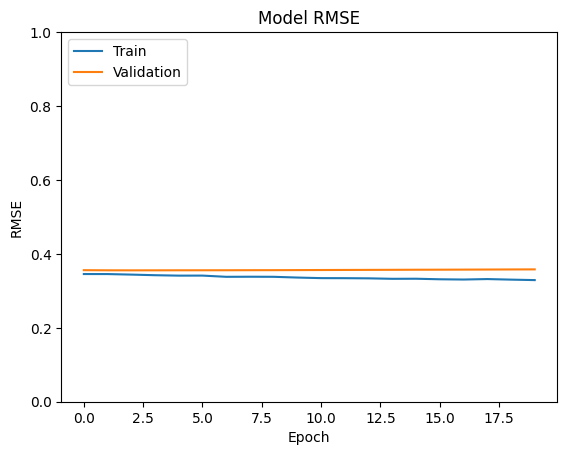

In [20]:
# Plot RMSE (Root Mean Squared Error) selama pelatihan
plt.plot(history.history['root_mean_squared_error'])  # Menampilkan RMSE pada data training
plt.plot(history.history['val_root_mean_squared_error'])  # Menampilkan RMSE pada data validasi

# Memberikan judul pada plot
plt.title('Model RMSE')

# Memberikan label untuk sumbu Y (RMSE)
plt.ylabel('RMSE')

# Mengatur batas sumbu Y agar nilai RMSE tetap berada antara 0 dan 1
plt.ylim(0,1)

# Memberikan label untuk sumbu X (Epoch)
plt.xlabel('Epoch')

# Menambahkan legenda untuk membedakan antara hasil RMSE data training dan validasi
plt.legend(['Train', 'Validation'], loc='upper left')

# Menampilkan plot
plt.show()


In [21]:
def recommend_by_collaborative_filtering(user_id, model, data, place_encoded_to_place, top_n=10):
    """
    Mengembalikan rekomendasi Collaborative Filtering untuk seorang pengguna berdasarkan model yang telah dilatih.

    Parameters:
    - user_id (int): ID pengguna yang akan direkomendasikan tempat.
    - model (tf.keras.Model): Model Collaborative Filtering yang telah dilatih dan digunakan untuk prediksi rating.
    - data (pd.DataFrame): Dataset yang berisi interaksi pengguna dengan tempat wisata (ratings).
    - place_encoded_to_place (dict): Mapping dari encoded Place ke Place_Id (untuk mengonversi kembali Place yang sudah di-encode).
    - top_n (int, optional): Jumlah rekomendasi yang diinginkan. Default adalah 10.

    Returns:
    - pd.DataFrame: Daftar rekomendasi tempat wisata, berisi nama tempat, kategori, rating, dan deskripsi.
    """

    # Mencari encoded user_id berdasarkan user_to_user_encoded
    user_encoded = user_to_user_encoded.get(user_id)

    # Jika user_id tidak ditemukan, mengembalikan DataFrame kosong
    if user_encoded is None:
        print("User ID tidak ditemukan. Tidak dapat memberikan rekomendasi.")
        return pd.DataFrame()

    # Mendapatkan tempat-tempat yang sudah pernah dikunjungi oleh pengguna
    user_places = data[data['User_Id'] == user_id]['Place_Id'].tolist()

    # Meng-encode ID tempat-tempat yang sudah dikunjungi
    user_places_encoded = [place_to_place_encoded.get(x) for x in user_places]

    # Mengidentifikasi tempat yang belum pernah dikunjungi oleh pengguna
    all_places = set(place_ids)
    places_not_visited = list(all_places - set(user_places))

    # Meng-encode ID tempat yang belum dikunjungi
    places_not_visited_encoded = [place_to_place_encoded.get(x) for x in places_not_visited]

    # Membuat array untuk input model: user_encoded berulang sebanyak jumlah tempat yang belum dikunjungi
    user_array = np.array([user_encoded] * len(places_not_visited_encoded))
    place_array = np.array(places_not_visited_encoded)

    # Menggunakan model untuk memprediksi rating yang diberikan oleh pengguna terhadap tempat yang belum dikunjungi
    predictions = model.predict(np.vstack([user_array, place_array]).T).flatten()

    # Mengurutkan prediksi rating dari yang tertinggi dan memilih top_n rekomendasi
    top_indices = predictions.argsort()[-top_n:][::-1]

    # Mendapatkan Place_Id dari tempat yang direkomendasikan
    recommended_place_ids = [place_encoded_to_place.get(places_not_visited_encoded[i]) for i in top_indices]

    # Mengambil informasi detail destinasi yang direkomendasikan berdasarkan Place_Id
    recommended_destinations = data_tourism_with_id_clean[
        data_tourism_with_id_clean['Place_Id'].isin(recommended_place_ids)
    ][['Place_Name', 'Category', 'Rating', 'Description']].copy()

    # Menambahkan kolom nomor urut untuk kemudahan referensi
    recommended_destinations.reset_index(drop=True, inplace=True)
    recommended_destinations.index += 1  # Menambahkan indeks mulai dari 1
    recommended_destinations.index.name = 'No.'  # Menambahkan label 'No.' di indeks

    return recommended_destinations


In [22]:
# Memilih satu sample User_Id secara acak dari data_collab
user_sample = data_collab['User_Id'].sample(1).iloc[0]

# Mendapatkan rekomendasi tempat wisata untuk pengguna yang dipilih dengan Collaborative Filtering
collab_recommendations = recommend_by_collaborative_filtering(
    user_sample,        # User ID yang dipilih secara acak
    model,              # Model Collaborative Filtering yang telah dilatih
    data_collab,        # Data yang berisi interaksi pengguna dengan tempat wisata
    place_encoded_to_place,  # Mapping dari encoded Place ke Place_Id
    top_n=10            # Jumlah rekomendasi yang diinginkan (10 rekomendasi)
)

# Menampilkan hasil rekomendasi untuk pengguna yang dipilih
print(f"Rekomendasi berdasarkan Collaborative Filtering untuk User ID {user_sample}:")
display(collab_recommendations)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Rekomendasi berdasarkan Collaborative Filtering untuk User ID 206:


,Place_Name,Category,Rating,Description
No.,,,,
1,Pantai Baron,Bahari,4.4,Pantai Baron adalah salah satu objek wisata be...
2,Pintoe Langit Dahromo,Cagar Alam,4.4,Pintu Langit Dahromo ini menyediakan berbagai ...
3,Stone Garden Citatah,Taman Hiburan,4.4,"Stone Garden, adalah sebutan nama untuk hampa..."
4,Taman Lansia,Taman Hiburan,4.4,Berlibur santai di akhir pekan cocok dilakukan...
5,Teras Cikapundung BBWS,Taman Hiburan,4.3,Teras Cikapundung Bandung sebelumnya merupakan...
6,Museum Barli,Budaya,4.4,Museum Barli adalah sebuah museum yang terleta...
7,Museum Pos Indonesia,Budaya,4.5,Museum Pos Indonesia telah ada sejak masa Hind...
8,Curug Batu Templek,Cagar Alam,4.1,Curug Batu Templek Bandung adalah sebuah wisat...
9,Masjid Agung Trans Studio Bandung,Tempat Ibadah,4.8,Masjid Agung Trans Studio Bandung (TSB) berdir...


# Evaluation

## Metrik Evaluasi
- **Precision@10:** Mengukur proporsi rekomendasi yang relevan di antara 10 rekomendasi teratas.
- **Root Mean Squared Error (RMSE):** Mengukur perbedaan antara nilai prediksi dan nilai aktual. Semakin rendah nilai RMSE, semakin baik performa model.
- **Mean Absolute Error (MAE):** Mengukur rata-rata kesalahan absolut antara nilai prediksi dan nilai aktual.

## Penjelasan Metrik

### MAE Formula:
$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$
Di mana:
- $y_i$ adalah nilai aktual,
- $\hat{y}_i$ adalah nilai prediksi,
- $n$ adalah jumlah sampel.

**Mean Absolute Error (MAE)** mengukur rata-rata kesalahan absolut antara prediksi dan nilai aktual. Tidak seperti RMSE, yang mengkuadratkan setiap kesalahan, MAE menghitung nilai absolut dari perbedaan antara prediksi dan aktual, sehingga tidak terlalu sensitif terhadap kesalahan besar.

### RMSE Formula:
  $$RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$$
  Di mana $y_i$ adalah nilai aktual dan $\hat{y}_i$ adalah nilai prediksi.

**RMSE** digunakan karena memberikan gambaran seberapa jauh prediksi model dari nilai aktual secara kuadrat, sehingga lebih sensitif terhadap kesalahan besar.

In [23]:
def evaluate_precision(recommendation_data, similarity_tags, similarity_desc, places_to_evaluate, top_n=10, desc_threshold=0.5):
    """
    Mengevaluasi Precision@10 berdasarkan Category dan Description.

    Parameters:
    - recommendation_data (pd.DataFrame): Dataset destinasi wisata yang telah diproses.
    - similarity_tags (sparse matrix): Matriks similarity berdasarkan Tags (Description + Category).
    - similarity_desc (sparse matrix): Matriks similarity berdasarkan Description.
    - places_to_evaluate (list): Daftar nama tempat yang akan dievaluasi.
    - top_n (int, optional): Jumlah rekomendasi yang diinginkan. Default is 10.
    - desc_threshold (float, optional): Threshold untuk similarity Description. Default is 0.5.

    Returns:
    - pd.DataFrame: Hasil evaluasi Precision@10 untuk setiap tempat.
    """
    evaluation_results = []
    precision_list = []

    for place in places_to_evaluate:
        print(f"\nEvaluasi untuk '{place}':")

        # Mendapatkan Place_Id yang direkomendasikan
        recommended_place_ids = get_content_based_recommendations(place, recommendation_data, similarity_tags, top_n=top_n)

        if not recommended_place_ids:
            print(f"Rekomendasi untuk '{place}' kosong.")
            continue

        # Mengambil informasi detail destinasi berdasarkan Place_Id
        recommended_destinations = recommendation_data[
            recommendation_data['Place_Id'].isin(recommended_place_ids)
        ][['Place_Name', 'Category', 'Rating', 'Description_Preprocessed']].copy()

        # Menambahkan kolom nomor urut
        recommended_destinations.reset_index(drop=True, inplace=True)
        recommended_destinations.index += 1
        recommended_destinations.index.name = 'No.'

        # Mendapatkan Category dan Description_Preprocessed dari tempat input
        input_place = recommendation_data[recommendation_data['Place_Name'] == place].iloc[0]
        input_category = input_place['Category']
        input_desc_preprocessed = input_place['Description_Preprocessed']

        # Menghitung similarity Description antara input place dan semua rekomendasi
        input_idx = recommendation_data[recommendation_data['Place_Name'] == place].index[0]
        desc_similarities = similarity_desc[input_idx, recommended_destinations.index - 1].toarray().flatten()

        # Menentukan relevansi berdasarkan Category atau Description similarity
        recommended_destinations['Description_Similarity'] = desc_similarities
        recommended_destinations['Relevance'] = ((recommended_destinations['Category'] == input_category) |
                                                  (recommended_destinations['Description_Similarity'] >= desc_threshold)).astype(int)

        # Menampilkan hasil rekomendasi beserta kesamaan deskripsi
        print(f"Rekomendasi:")
        display(recommended_destinations[['Place_Name', 'Category', 'Rating', 'Description_Similarity', 'Relevance']])

        # Menghitung True Positives (TP) dan False Positives (FP)
        TP = recommended_destinations['Relevance'].sum()
        FP = top_n - TP

        # Menghitung Precision@10
        precision = TP / top_n
        print(f"True Positive (TP): {TP}")
        print(f"False Positive (FP): {FP}")
        print(f"Precision@10 untuk '{place}': {precision * 100:.2f}%")
        print(f"Nilai kesamaan deskripsi untuk setiap rekomendasi:")

        # Menyimpan hasil evaluasi
        evaluation_results.append({
            'Place': place,
            'Precision@10': f"{precision * 100:.2f}%"
        })

        # Menyimpan nilai precision untuk rata-rata
        precision_list.append(precision)

    # Menghitung rata-rata Precision@10
    avg_precision = np.mean(precision_list) if precision_list else 0

    return pd.DataFrame(evaluation_results), avg_precision

In [24]:
# Mendefinisikan daftar tempat untuk evaluasi
places_to_evaluate = ['Museum Fatahillah']

# Mengevaluasi Precision@10 menggunakan fungsi evaluate_precision
evaluation_df, avg_precision = evaluate_precision(
    recommendation_data,
    similarity_tags,      # Matriks similarity berdasarkan Tags (Description + Category)
    similarity_desc,      # Matriks similarity berdasarkan Description
    places_to_evaluate,
    top_n=10,
    desc_threshold=0.5    # Threshold untuk similarity Description
)

# Menampilkan hasil evaluasi Precision@10
print("\n=== Hasil Evaluasi Precision@10 ===")
display(evaluation_df)


Evaluasi untuk 'Museum Fatahillah':
Rekomendasi:


,Place_Name,Category,Rating,Description_Similarity,Relevance
No.,,,,,
1,Kota Tua,Budaya,4.6,0.052221,1
2,Museum Nasional,Budaya,4.6,0.171963,1
3,Museum Seni Rupa dan Kramik,Budaya,4.4,0.047923,1
4,Museum Joang 45,Budaya,4.0,0.051913,1
5,Museum Kebangkitan Nasional,Budaya,4.7,0.019368,1
6,Museum Tengah Kebun,Budaya,4.6,0.038899,1
7,Museum Sonobudoyo Unit I,Budaya,4.6,0.027344,1
8,Museum Sri Baduga,Budaya,4.5,0.011554,1
9,Museum Gedung Sate,Budaya,4.6,0.037989,1


True Positive (TP): 10
False Positive (FP): 0
Precision@10 untuk 'Museum Fatahillah': 100.00%
Nilai kesamaan deskripsi untuk setiap rekomendasi:

=== Hasil Evaluasi Precision@10 ===


,Place,Precision@10
0,Museum Fatahillah,100.00%


In [25]:
# Mendapatkan prediksi untuk data validasi
y_pred_cf = model.predict(x_val_cf).flatten()

# Menghitung RMSE dan MAE
rmse_cf = np.sqrt(mean_squared_error(y_val_cf, y_pred_cf))
mae_cf = mean_absolute_error(y_val_cf, y_pred_cf)

print(f"Collaborative Filtering - RMSE: {rmse_cf:.4f}")
print(f"Collaborative Filtering - MAE: {mae_cf:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Collaborative Filtering - RMSE: 0.3581
Collaborative Filtering - MAE: 0.3102


In [26]:
# Menampilkan hasil evaluasi
print("=== Evaluation Results ===")
print(f"Content-based Filtering - Precision@10: {avg_precision * 100:.2f}%")
print(f"Collaborative Filtering - RMSE: {rmse_cf:.4f}")
print(f"Collaborative Filtering - MAE: {mae_cf:.4f}")

=== Evaluation Results ===
Content-based Filtering - Precision@10: 100.00%
Collaborative Filtering - RMSE: 0.3581
Collaborative Filtering - MAE: 0.3102


In [27]:
# Membuat DataFrame untuk hasil evaluasi
evaluation_results_final = pd.DataFrame({
    'Metric': ['Precision@10', 'RMSE', 'MAE'],
    'Content-based Filtering': [f"{avg_precision * 100:.2f}%", np.nan, np.nan],
    'Collaborative Filtering': [np.nan, f"{rmse_cf:.4f}", f"{mae_cf:.4f}"]
})

# Menampilkan DataFrame Evaluasi Akhir
display(evaluation_results_final)

,Metric,Content-based Filtering,Collaborative Filtering
0,Precision@10,100.00%,NaN
1,RMSE,NaN,0.3581
2,MAE,NaN,0.3102


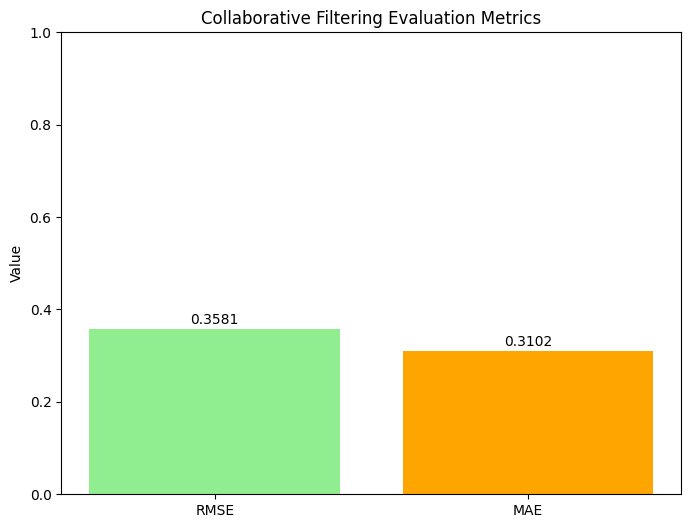

In [28]:
# Plot RMSE dan MAE untuk Collaborative Filtering
plt.figure(figsize=(8,6))
plt.bar(['RMSE', 'MAE'], [rmse_cf, mae_cf], color=['lightgreen', 'orange'])
plt.title('Collaborative Filtering Evaluation Metrics')
plt.ylabel('Value')
plt.ylim(0, 1)
for i, v in enumerate([rmse_cf, mae_cf]):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
plt.show()